In [30]:
import pandas as pd
import numpy as np
import yfinance as yf

In [31]:
name = 'GOOG'  #종목명 -구글

start_day = '2021-01-01'
end_day = '2024-08-01'

In [32]:
stock = yf.download(name, start=start_day, end=end_day)

C:\Users\minja\AppData\Local\Temp\ipykernel_33032\2624966132.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(name, start=start_day, end=end_day)
[*********************100%***********************]  1 of 1 completed


In [33]:
print(stock.shape)  #작업 확인용 출력
stock.head() #작업 확인용 출력

(899, 5)


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2021-01-04,85.824692,87.434176,84.812120,87.279731,38038000
2021-01-05,86.454361,86.789569,85.316897,85.663774,22906000
2021-01-06,86.174782,86.805960,84.372608,84.552878,52042000
2021-01-07,88.755135,88.812239,86.262192,86.411667,45300000
2021-01-08,89.746338,89.876944,88.074036,88.791378,41012000


In [34]:
# 데이터 준비 및 탐색
# 분석할 칼럼(날짜, 종가) 추출
stock2 = pd.DataFrame(stock['Close'])

stock2.head() #작업 확인용 출력

Ticker,GOOG
Date,
2021-01-04,85.824692
2021-01-05,86.454361
2021-01-06,86.174782
2021-01-07,88.755135
2021-01-08,89.746338


In [35]:
# 다운로드한 주가 데이터를 파일 저장
stock2.to_csv('14장_data/' + name + '.csv', index=False, encoding='utf-8-sig')

In [36]:
stock2.reset_index()
stock_values = stock2.values

print(stock_values[0]) #작업 확인용 출력

[85.82469177]


In [37]:
# 0~1 범위로 스케일링
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
stock_values_scaled=scaler.fit_transform(stock_values)

stock_values_scaled[0] #작업 확인용 출력

array([0.02671207])

In [39]:
# 3. 분석모델 구축
n_train = int(len(stock_values)*0.8)  #학습용 데이터 갯수
n_test = len(stock_values) - n_train  #평가용 데이터 갯수

print(n_train, n_test) #작업 확인용 출력

719 180


In [40]:
X_train,Y_train=[],[]

#20일 구간의 주가를 x 값으로하고, 그 다음날 값을 y 값으로 정리하기
for i in range(20, n_train):
  X_train.append(stock_values_scaled[i-20:i,0])
  Y_train.append(stock_values_scaled[i,0])

X_train[0] #작업 확인용 출력

array([0.02671207, 0.03250769, 0.02993438, 0.05368452, 0.06280778,
       0.0443006 , 0.03508121, 0.03866916, 0.03216949, 0.03034581,
       0.05533455, 0.09923284, 0.10122112, 0.10570056, 0.10494644,
       0.11310076, 0.07358577, 0.08835879, 0.07584841, 0.10583756])

In [41]:
X_train1, Y_train1 = np.array(X_train), np.array(Y_train)
X_train2 = np.reshape(X_train1, (X_train1.shape[0],X_train1.shape[1],1))

print(X_train2.shape) #작업 확인용 출력
X_train2[0] #작업 확인용 출력

(699, 20, 1)


array([[0.02671207],
       [0.03250769],
       [0.02993438],
       [0.05368452],
       [0.06280778],
       [0.0443006 ],
       [0.03508121],
       [0.03866916],
       [0.03216949],
       [0.03034581],
       [0.05533455],
       [0.09923284],
       [0.10122112],
       [0.10570056],
       [0.10494644],
       [0.11310076],
       [0.07358577],
       [0.08835879],
       [0.07584841],
       [0.10583756]])

In [42]:
lstm_stock = Sequential()

lstm_stock.add(LSTM(units=20, return_sequences=True, input_shape=(X_train2.shape[1],1)))
lstm_stock.add(LSTM(units=20, return_sequences=False))
lstm_stock.add(Dense(1))

C:\Users\minja\PycharmProjects\WebCrawling\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
#학습 파라미터  설정
lstm_stock.compile(loss='mean_squared_error', optimizer='adam')

#학습 수행
lstm_stock.fit(X_train2, Y_train1, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
699/699 - 7s - 10ms/step - loss: 0.0037
Epoch 2/10
699/699 - 6s - 8ms/step - loss: 0.0021
Epoch 3/10
699/699 - 6s - 8ms/step - loss: 0.0014
Epoch 4/10
699/699 - 6s - 9ms/step - loss: 0.0013
Epoch 5/10
699/699 - 5s - 8ms/step - loss: 0.0010
Epoch 6/10
699/699 - 11s - 16ms/step - loss: 8.6959e-04
Epoch 7/10
699/699 - 5s - 8ms/step - loss: 7.9957e-04
Epoch 8/10
699/699 - 6s - 8ms/step - loss: 6.8882e-04
Epoch 9/10
699/699 - 5s - 8ms/step - loss: 6.4084e-04
Epoch 10/10
699/699 - 5s - 8ms/step - loss: 6.6592e-04


In [45]:
# 3-3 평가 데이터로 주가 예측
stock_test = stock_values_scaled[n_train-20:]
X_test = []

for i in range(20, len(stock_test)):
  X_test.append(stock_test[i-20:i,0])


X_test[0] #작업 확인용 출력

array([0.50361454, 0.52107512, 0.52564605, 0.51001351, 0.50727089,
       0.48679368, 0.497398  , 0.51769221, 0.39473711, 0.3652096 ,
       0.36484388, 0.38632675, 0.38221311, 0.40296474, 0.41219762,
       0.42856126, 0.43843456, 0.44711872, 0.45498071, 0.44062846])

In [46]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

print(X_test.shape)  #작업 확인용 출력
print(X_test[0])

(180, 20, 1)
[[0.50361454]
 [0.52107512]
 [0.52564605]
 [0.51001351]
 [0.50727089]
 [0.48679368]
 [0.497398  ]
 [0.51769221]
 [0.39473711]
 [0.3652096 ]
 [0.36484388]
 [0.38632675]
 [0.38221311]
 [0.40296474]
 [0.41219762]
 [0.42856126]
 [0.43843456]
 [0.44711872]
 [0.45498071]
 [0.44062846]]


In [47]:
predicted_value = lstm_stock.predict(X_test)

predicted_value[0] #작업 확인용 출력

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


array([0.446657], dtype=float32)

In [48]:
# 4. 결과 분석 및 시각화
predicted_value = scaler.inverse_transform(predicted_value)

predicted_value[0] #작업 확인용 출력

array([131.44992], dtype=float32)

In [50]:
stock_train_vis = stock[:n_train].copy()
stock_test_vis = stock[n_train:].copy()

stock_test_vis.loc[:, 'Predictions'] = predicted_value

In [51]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'GOOG (2021-01-01 ~ 2024-08-01 )')

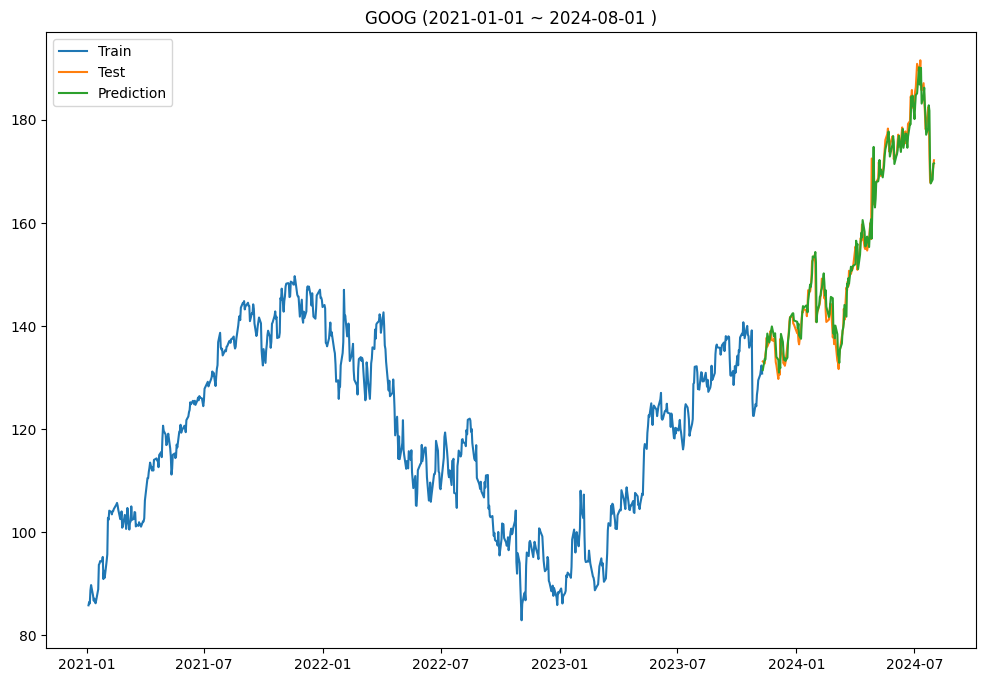

In [52]:
plt.figure(figsize = (12,8))
plt.plot(stock_train_vis['Close'], label = 'Train')
plt.plot(stock_test_vis['Close'], label = 'Test')
plt.plot(stock_test_vis['Predictions'], label = 'Prediction')
plt.legend()
plt.title(name + ' (' + start_day + ' ~ ' + end_day + ' )')